In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.svm import SVC

# evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [2]:
# load datasets
train_proc=pd.read_csv("train_proc.csv")
test_proc = pd.read_csv("test_proc.csv")

In [3]:
# splitting from training and validation data
X = train_proc.drop("Survived", axis =1)
y = train_proc['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [5]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,-0.551881,1,0,-0.726134,False,True,True,False,True,False,True,False,False
1,0.768879,1,0,2.353815,False,False,False,False,False,False,False,True,False
2,-0.221691,0,0,-0.693667,False,True,False,False,True,True,False,False,False
3,0.521236,1,0,1.479214,False,False,False,False,True,False,False,True,False
4,0.521236,0,0,-0.687655,False,True,True,False,True,False,True,False,False


In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
# prediction accuracy on validation set with default model
svc = SVC()
svc.fit(X_train,y_train.values.ravel())
y_pred = svc.predict(X_test)
print('Accuracy Score: {}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7904191616766467


In [8]:
# comparing SVM models accuracy with kernel linear, poly and rbf
svc_linear = SVC(kernel='linear').fit(X_train,y_train.values.ravel())
svc_poly = SVC(kernel='poly').fit(X_train,y_train.values.ravel())
svc_rbf = SVC(kernel='rbf').fit(X_train,y_train.values.ravel())

In [9]:
print(f'Score with linear kernel : train {svc_linear.score(X_train,y_train)}, test {svc_linear.score(X_test,y_test)}')
print(f'Score with polynomial kernel : train {svc_poly.score(X_train,y_train)}, test {svc_poly.score(X_test,y_test)}')
print(f'Score with radial basis function kernel : train {svc_rbf.score(X_train,y_train)}, test {svc_rbf.score(X_test,y_test)}')

Score with linear kernel : train 0.8328313253012049, test 0.7724550898203593
Score with polynomial kernel : train 0.8569277108433735, test 0.7904191616766467
Score with radial basis function kernel : train 0.8448795180722891, test 0.7904191616766467


In [11]:
# cross validation score for hyper parameter C optimisation
accuracy_rate = []
for c in range(1,11):     
    svc = SVC(kernel='linear',C=c)
    cross_val_results=cross_val_score(svc,X_train, y_train.values.ravel(),cv=5)
    accuracy_rate.append(cross_val_results.mean())
print(accuracy_rate)

[0.8298473456368193, 0.8313511050353155, 0.832866256550467, 0.832866256550467, 0.8313511050353155, 0.8313511050353155, 0.8313511050353155, 0.832866256550467, 0.832866256550467, 0.832866256550467]


Text(0, 0.5, 'Accuracy Rate')

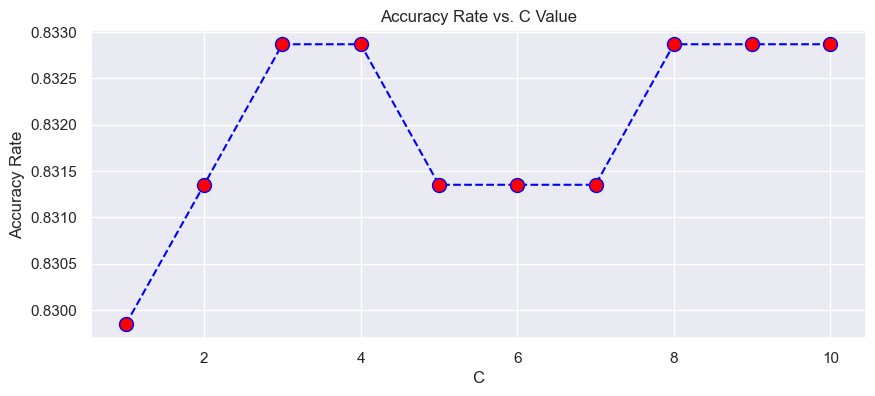

In [12]:
plt.figure(figsize=(10,4))
plt.plot(range(1,11),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy Rate')

In [13]:
accuracy_rate = []
for c in np.arange(3,4,0.1):     
    svc = SVC(kernel='linear',C=c)
    cross_val_results=cross_val_score(svc,X_train, y_train.values.ravel(),cv=5)
    accuracy_rate.append(cross_val_results.mean())
print(accuracy_rate)

[0.832866256550467, 0.832866256550467, 0.832866256550467, 0.832866256550467, 0.8313511050353155, 0.832866256550467, 0.832866256550467, 0.832866256550467, 0.832866256550467, 0.832866256550467]


Text(0, 0.5, 'Accuracy Rate')

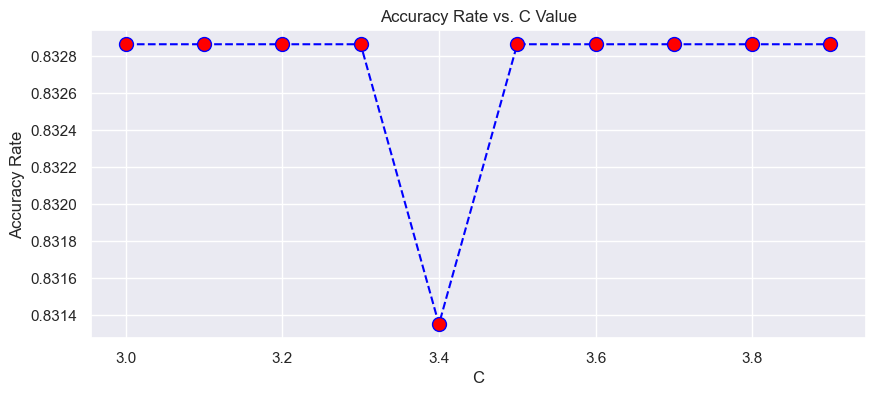

In [16]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(3,4,0.1),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy Rate')

In [18]:
# cross validation score for hyper parameter gamma optimisation
gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
accuracy_rate = []
for g in gamma_range:     
    svc = SVC(kernel='rbf',gamma=g)
    cross_val_results=cross_val_score(svc,X_train, y_train.values.ravel(),cv=5)
    accuracy_rate.append(cross_val_results.mean())
print(accuracy_rate)

[0.6460811118705856, 0.6460811118705856, 0.8042378673957622, 0.8343586238323081, 0.8147983595352016, 0.6807359307359307, 0.6626566416040099]


Text(0, 0.5, 'Accuracy Rate')

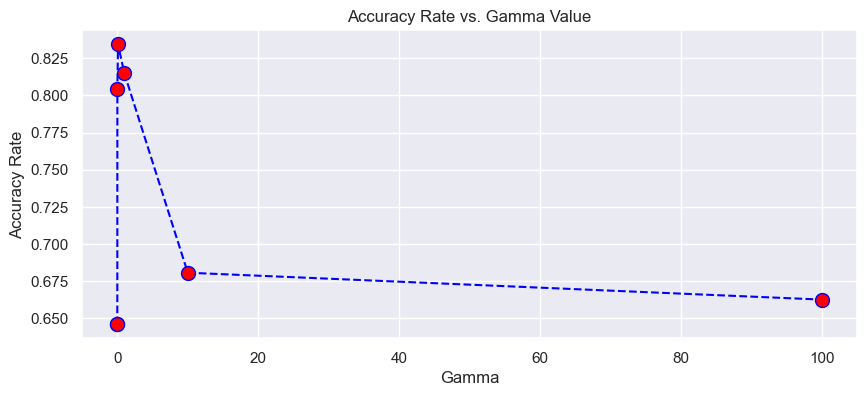

In [19]:
plt.figure(figsize=(10,4))
plt.plot(gamma_range,accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Gamma Value')
plt.xlabel('Gamma')
plt.ylabel('Accuracy Rate')

In [20]:
# grid search CV for model optimisation
param_tree={'C': [2,3,4], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(SVC(), param_tree, cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train.values.ravel())
print(grid_search.best_estimator_) # Get the best estimator from the grid search
print(grid_search.best_params_)
print(grid_search.best_score_)

SVC(C=3, gamma=1, kernel='linear')
{'C': 3, 'gamma': 1, 'kernel': 'linear'}
0.832866256550467


In [22]:
# random search CV for model optimisation
random_search = RandomizedSearchCV(SVC(), param_tree, cv=5, random_state=12)
random_search.fit(X_train,y_train.values.ravel())
print(random_search.best_estimator_) # Get the best estimator from the random search
print(random_search.best_params_)
print(random_search.best_score_)

SVC(C=4, gamma=0.1, kernel='linear')
{'kernel': 'linear', 'gamma': 0.1, 'C': 4}
0.832866256550467


In [23]:
# cross validation score with random shuffling
kf=KFold(5, shuffle=True, random_state=10) #for shuffling
cross_val_results = cross_val_score(SVC(kernel='linear', C=3, gamma=0.1, random_state=15), 
                                    X_train, y_train.values.ravel(), cv=kf)
print(cross_val_results)
print(cross_val_results.mean())

[0.78947368 0.83458647 0.90225564 0.84962406 0.78030303]
0.831248575985418


In [24]:
# predictions on validation set and accuracy with optimised model
svc=SVC(kernel='linear', C=3, gamma=0.1).fit(X_train,y_train.values.ravel())
predictions = svc.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7724550898203593


In [25]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
confusion_matrix(y_test,predictions)

array([[89, 11],
       [27, 40]], dtype=int64)

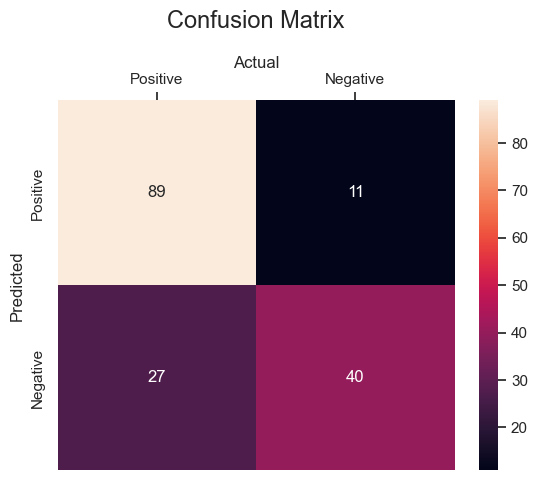

In [26]:
sns.heatmap(cm, 
            annot=True,
            fmt="d", 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Predicted')
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.xlabel('Actual')
plt.show()

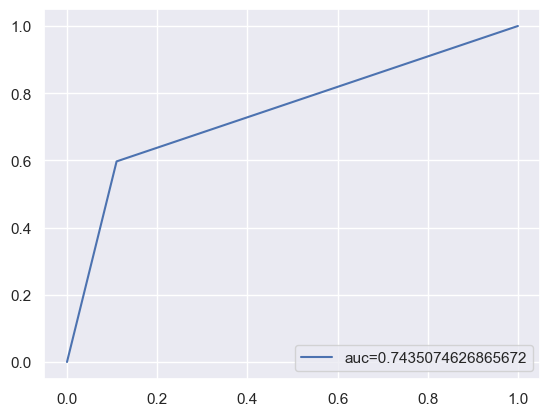

In [28]:
# roc-auc curve
fpr, tpr, _ = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
# classification report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.78      0.60      0.68        67

    accuracy                           0.77       167
   macro avg       0.78      0.74      0.75       167
weighted avg       0.77      0.77      0.77       167



In [30]:
# predictions on test data
predictions = svc.predict(test_proc)

# creating dataframe of test predictions with Passenger Id, uncomment after loading test file with Passenger Id
# prediction_df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})

# Save the predictions to a CSV file, uncomment to save file
# prediction_df.to_csv('prediction.csv', index=False)